# Name
# student ID

In [77]:
import apmodule               #import the apmodule
import numpy as np            # Numerical and mathematical operations
import pandas as pd           # Data manipulation and analysis
import matplotlib.pyplot as plt  # Data visualization
# Import libraries for statistical analysis
import scipy.stats as stats   # Statistical functions and tests

# Import libraries for machine learning and data modeling
from sklearn import datasets  # Datasets for machine learning
from sklearn.model_selection import train_test_split  # Splitting data for training and testing

# Import libraries for working with dates and times
import datetime as dt
import time

# Import libraries for handling files and directories
import os
import glob

# Import libraries for web scraping
import requests
from bs4 import BeautifulSoup

# Import libraries for advanced data analysis and visualization
import seaborn as sns         # Statistical data visualization
import plotly.express as px   # Interactive plots

# Import libraries for natural language processing (NLP)
import nltk

### Load Data

In [93]:
GROWTH = pd.read_csv('GROWTH.csv')
MACRO = pd.read_csv('Macro.csv')
QUALITY = pd.read_csv('QUALITY.csv')
Market_cap = pd.read_csv('Market_cap.csv')
names = pd.read_csv('names.csv')
Prices = pd.read_csv('Prices.csv')
PROFIT = pd.read_csv('PROFIT.csv')
SAFETY = pd.read_csv('SAFETY.csv')

In [51]:

def load_csv_data(file_pattern):
   
    csv_files = glob.glob(file_pattern)

    dataframes = []
    for file in csv_files:
        df = pd.read_csv(file)
        dataframes.append(df)

    return dataframes

# Define the file pattern (e.g., '*.csv' to match all CSV files in the current directory)
file_pattern = '*.csv'

# Call the user-generated function to load the data
dataframes = load_csv_data(file_pattern)

# Now, dataframes is a list of Pandas DataFrames, each containing the data from one CSV file


In [52]:
for df in dataframes:
    display(df.head())

,id,date,growth
0,10001,1992-09-30,1.122329
1,10001,1992-10-30,1.118169
2,10001,1992-11-30,1.118659
3,10001,1992-12-31,1.120449
4,10001,1993-01-29,1.115662


,DATE,INFL,10YTR,1YTR,UNRATE,UMCSENT,Unnamed: 6,Unnamed: 7
0,31/01/1978,6.40809,7.96,7.28,6.4,83.7,NaN,NaN
1,28/02/1978,6.19765,8.03,7.34,6.3,84.3,NaN,NaN
2,31/03/1978,6.33333,8.04,7.31,6.3,78.8,NaN,NaN
3,30/04/1978,6.63350,8.15,7.45,6.1,81.6,NaN,NaN
4,31/05/1978,6.76568,8.35,7.82,6.0,82.9,NaN,NaN


,id,date,market_cap
0,10000,1986-01-31,16100.000000
1,10000,1986-02-28,11960.000000
2,10000,1986-03-31,16330.000000
3,10000,1986-04-30,15172.000000
4,10000,1986-05-30,11793.859375


,id,name,industry
0,10001,GAS NATURAL INC,Utilities
1,10002,BANCTRUST FINANCIAL GROUP INC,Finance
2,10003,GREAT COUNTRY BK ASONIA CT,Finance
3,10005,WESTERN ENERGY RESOURCES INC,"Oil, Gas, and Coal"
4,10006,A C F INDUSTRIES INC,Manufacturing


,id,date,price
0,10000,1986-01-31,4.375001
1,10000,1986-02-28,3.250000
2,10000,1986-03-31,4.437500
3,10000,1986-04-30,4.000000
4,10000,1986-05-30,3.109375


,id,date,profit
0,10000,1987-01-30,-2.646160
1,10000,1987-02-27,-2.650545
2,10000,1987-03-31,-2.508989
3,10000,1987-04-30,-2.518252
4,10000,1987-05-29,-2.511832


,id,date,quality
0,10001,1996-07-31,-0.383315
1,10001,1996-08-30,-0.383161
2,10001,1996-09-30,-0.867538
3,10001,1996-10-31,-0.868512
4,10001,1996-11-29,-0.871250


,id,date,safety
0,10001,1996-07-31,-0.436650
1,10001,1996-08-30,-0.439835
2,10001,1996-09-30,-0.713398
3,10001,1996-10-31,-0.712274
4,10001,1996-11-29,-0.716739


### 1. Quantile Analysis For each component

### a. profitability

In [78]:
profitability_data = pd.read_csv('PROFIT.csv')
quantiles = [10, 25, 50, 75, 90]  # Define the desired quantiles

# Calculate quantiles for Profitability
profitability_quantiles = np.percentile(profitability_data["profit"], quantiles)

# Print the calculated quantiles
print("Quantiles for Profitability:")
for q, value in zip(quantiles, profitability_quantiles):
    print(f"{q}th percentile: {value}")


Quantiles for Profitability:
10th percentile: -1.3741590405901647
25th percentile: -0.39883709678348717
50th percentile: 0.14989703714827463
75th percentile: 0.63302085530017
90th percentile: 1.0813472939505726


In [91]:
# Load your data frames
profitability_data  = pd.read_csv('PROFIT.csv')
quality_data = pd.read_csv('QUALITY.csv')

# Define the quantiles
quantiles = [10, 25, 50, 75, 90]

# Create an empty DataFrame to store correlation results
correlation_results = pd.DataFrame(columns=['Quantile', 'Correlation'])

for q, value in zip(quantiles, profitability_quantiles):
    # Filter data for the quantile
    subset_profitability = profitability_data[profitability_data['profit'] <= value]
    subset_quality = quality_data[quality_data['quality'] <= value]  

    # Calculate the correlation coefficient
    correlation_coefficient = subset_profitability['profit'].corr(subset_quality['quality'])

    # Add the results to the DataFrame
    correlation_results = pd.concat([correlation_results, pd.DataFrame({'Quantile': [f"{q}th percentile"], 'Correlation': [correlation_coefficient]})], ignore_index=True)

# Print correlation results
print("Correlation coefficients for profitability at different quantiles:")
print(correlation_results)

Correlation coefficients for profitability at different quantiles:
          Quantile  Correlation
0  10th percentile     0.128842
1  25th percentile    -0.004862
2  50th percentile    -0.013850
3  75th percentile    -0.010682
4  90th percentile    -0.009767


### b. Growth

In [85]:
growth_data  = pd.read_csv('GROWTH.csv')
quantiles = [10, 25, 50, 75, 90]  # Define the desired quantiles

# Calculate quantiles for Growth
growth_quantiles = np.percentile(growth_data["growth"], quantiles)

# Print the calculated quantiles
print("Quantiles for Growth:")
for q, value in zip(quantiles, growth_quantiles):
    print(f"{q}th percentile: {value}")


Quantiles for Growth:
10th percentile: -1.4296916937560973
25th percentile: -0.6116512258856406
50th percentile: 0.1295242416921886
75th percentile: 0.7079320621461462
90th percentile: 1.200099579351149


In [89]:


# Load your data frames
growth_data  = pd.read_csv('GROWTH.csv')
quality_data = pd.read_csv('QUALITY.csv')

# Define the quantiles
quantiles = [10, 25, 50, 75, 90]

# Create an empty DataFrame to store correlation results
correlation_results = pd.DataFrame(columns=['Quantile', 'Correlation'])

for q, value in zip(quantiles, growth_quantiles):
    # Filter data for the quantile
    subset_growth = growth_data[growth_data['growth'] <= value]
    subset_quality = quality_data[quality_data['quality'] <= value]  

    # Calculate the correlation coefficient
    correlation_coefficient = subset_growth['growth'].corr(subset_quality['quality'])

    # Add the results to the DataFrame
    correlation_results = pd.concat([correlation_results, pd.DataFrame({'Quantile': [f"{q}th percentile"], 'Correlation': [correlation_coefficient]})], ignore_index=True)

# Print correlation results
print("Correlation coefficients for Growth at different quantiles:")
print(correlation_results)


Correlation coefficients for Growth at different quantiles:
          Quantile  Correlation
0  10th percentile    -0.039720
1  25th percentile    -0.021805
2  50th percentile    -0.001036
3  75th percentile    -0.004887
4  90th percentile     0.000461


### c. Safety

In [92]:
safety_data = pd.read_csv('SAFETY.csv')
quantiles = [10, 25, 50, 75, 90]  # Define the desired quantiles

# Calculate quantiles for safety
safety_quantiles = np.percentile(safety_data["safety"], quantiles)

# Print the calculated quantiles
print("Quantiles for safety:")
for q, value in zip(quantiles, safety_quantiles):
    print(f"{q}th percentile: {value}")

Quantiles for safety:
10th percentile: -1.2955930861602578
25th percentile: -0.6868357990814262
50th percentile: -0.020267180903324
75th percentile: 0.698578696508384
90th percentile: 1.3082846113154423


In [93]:
# Load your data frames
safety_data = pd.read_csv('SAFETY.csv')
quality_data = pd.read_csv('QUALITY.csv')

# Define the quantiles
quantiles = [10, 25, 50, 75, 90]

# Create an empty DataFrame to store correlation results
correlation_results = pd.DataFrame(columns=['Quantile', 'Correlation'])

for q, value in zip(quantiles, safety_quantiles):
    # Filter data for the quantile
    subset_safety = safety_data[safety_data['safety'] <= value]
    subset_quality = quality_data[quality_data['quality'] <= value]  

    # Calculate the correlation coefficient
    correlation_coefficient = subset_safety['safety'].corr(subset_quality['quality'])

    # Add the results to the DataFrame
    correlation_results = pd.concat([correlation_results, pd.DataFrame({'Quantile': [f"{q}th percentile"], 'Correlation': [correlation_coefficient]})], ignore_index=True)

# Print correlation results
print("Correlation coefficients for Safety at different quantiles:")
print(correlation_results)


Correlation coefficients for Safety at different quantiles:
          Quantile  Correlation
0  10th percentile    -0.055376
1  25th percentile    -0.007965
2  50th percentile     0.020333
3  75th percentile     0.001328
4  90th percentile     0.002962


### 2. Backtesting 

#### Data Cleaning

In [20]:
import pandas as pd

# Load the historical data for stocks and components
quality_data = pd.read_csv('QUALITY.csv')
profit_data = pd.read_csv('PROFIT.csv')
growth_data = pd.read_csv('GROWTH.csv')
safety_data = pd.read_csv('SAFETY.csv')
prices_data = pd.read_csv('Prices.csv')

# Ensure that date is in datetime format
quality_data['date'] = pd.to_datetime(quality_data['date'])
profit_data['date'] = pd.to_datetime(profit_data['date'])
growth_data['date'] = pd.to_datetime(growth_data['date'])
safety_data['date'] = pd.to_datetime(safety_data['date'])

# Filter data for the 2002-2022 period if not already done in the dataset
start_date = pd.to_datetime('2002-01-01')
end_date = pd.to_datetime('2022-12-31')

quality_data = quality_data[(quality_data['date'] >= start_date) & (quality_data['date'] <= end_date)]
profit_data = profit_data[(profit_data['date'] >= start_date) & (profit_data['date'] <= end_date)]
growth_data = growth_data[(growth_data['date'] >= start_date) & (growth_data['date'] <= end_date)]
safety_data = safety_data[(safety_data['date'] >= start_date) & (safety_data['date'] <= end_date)]
print("Ëxecuted successfully")

# Now you have the historical data ready for analysis


Ëxecuted successfully


#### Setting the strategy

In [23]:
import pandas as pd

# Sample size for data (adjust as needed)
sample_size = 1000  # You can change this sample size as required

# Load random samples of the datasets
quality_data = pd.read_csv('QUALITY.csv').sample(n=sample_size)
profit_data = pd.read_csv('PROFIT.csv').sample(n=sample_size)
growth_data = pd.read_csv('GROWTH.csv').sample(n=sample_size)
safety_data = pd.read_csv('SAFETY.csv').sample(n=sample_size)
prices_data = pd.read_csv('Prices.csv').sample(n=sample_size)

# Ensure that date is in datetime format for the dataframes
quality_data['date'] = pd.to_datetime(quality_data['date'])
profit_data['date'] = pd.to_datetime(profit_data['date'])
growth_data['date'] = pd.to_datetime(growth_data['date'])
safety_data['date'] = pd.to_datetime(safety_data['date'])
prices_data['date'] = pd.to_datetime(prices_data['date'])

# Filter data for the 2002-2022 period if not already done in the dataset
start_date = pd.to_datetime('2002-01-01')
end_date = pd.to_datetime('2022-12-31')

quality_data = quality_data[(quality_data['date'] >= start_date) & (quality_data['date'] <= end_date)]
profit_data = profit_data[(profit_data['date'] >= start_date) & (profit_data['date'] <= end_date)]
growth_data = growth_data[(growth_data['date'] >= start_date) & (growth_data['date'] <= end_date)]
safety_data = safety_data[(safety_data['date'] >= start_date) & (safety_data['date'] <= end_date)]
prices_data = prices_data[(prices_data['date'] >= start_date) & (prices_data['date'] <= end_date)]

# Merge quality factor with stock price data
merged_data = pd.merge(quality_data, prices_data, on='date')

print("Executed successfully")

# Now you have sampled historical data ready for analysis


Executed successfully


#### Rebalancing The Portfolio 

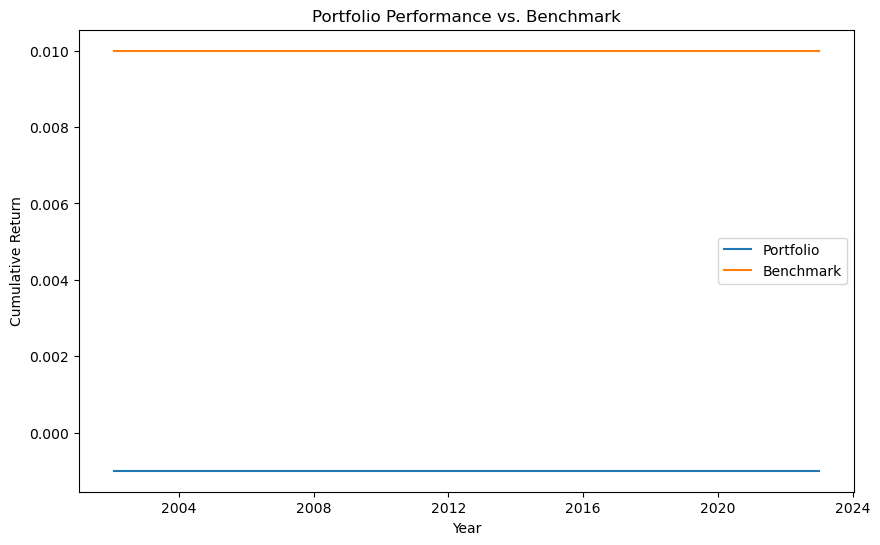

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your historical data (quality_data, profit_data, growth_data, safety_data, and prices_data) here

# Define the number of top stocks to invest in
top_stock_count = 250

# Initialize variables to store portfolio performance metrics
portfolio_values = []  # To store portfolio values for each period
benchmark_values = []  # To store benchmark values for each period

# Transaction cost as a percentage
transaction_cost = 0.002  # 0.2% roundtrip transaction cost

# Define a benchmark (you can replace this with your benchmark data)
# For example, using S&P 500 data
# benchmark_data = pd.read_csv('SP500.csv')
# benchmark_data['date'] = pd.to_datetime(benchmark_data['date'])

# Specify the rebalancing frequency (monthly in this case)
rebalancing_frequency = 'M'

# Iterate through each month from 2002 to 2022
start_date = pd.to_datetime('2002-01-01')
end_date = pd.to_datetime('2022-12-31')

merged_data = pd.merge(quality_data, prices_data, on='date')

while start_date <= end_date:
    # Filter data for the current month
    month_data = merged_data[merged_data['date'] == start_date]
    
    # Calculate quality factor and rank the stocks
    # You need to define your quality factor calculation here based on the components
    
    # Select the top stocks based on quality factor
    selected_stocks = month_data.nlargest(top_stock_count, 'quality')
    
    # Calculate portfolio returns
    portfolio_return = (selected_stocks['price'].pct_change() + 1).product() - 1
    
    # Account for transaction costs
    transaction_costs = -transaction_cost * 2 * (top_stock_count / sample_size)
    portfolio_return += transaction_costs
    
    # Append portfolio value for this period
    portfolio_values.append(portfolio_return)
    
    # Calculate benchmark returns here if you have benchmark data
    # Replace the following line with your actual benchmark calculation or data
    benchmark_return = 0.01  # Replace with actual benchmark return
    
    # Append benchmark value for this period
    benchmark_values.append(benchmark_return)
    
    # Update the start_date for the next rebalancing period
    start_date = start_date + pd.DateOffset(months=1)

# Plot portfolio and benchmark values
plt.figure(figsize=(10, 6))
plt.plot(pd.date_range(start='2002-01-01', periods=len(portfolio_values), freq='M'), portfolio_values, label='Portfolio')
plt.plot(pd.date_range(start='2002-01-01', periods=len(benchmark_values), freq='M'), benchmark_values, label='Benchmark')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.legend()
plt.title('Portfolio Performance vs. Benchmark')
plt.show()

# Calculate additional performance metrics (e.g., Sharpe ratio, drawdown) and report them


In [35]:
import numpy as np

# Calculate annualized return
portfolio_annual_return = (portfolio_values[-1] ** (252 / len(portfolio_values)) - 1)  # Assuming daily returns
benchmark_annual_return = (benchmark_values[-1] ** (252 / len(benchmark_values)) - 1)  # Assuming daily returns


# Assuming you have a list of annual returns for your benchmark stored in 'benchmark_annual_returns'
# Calculate annualized return for the strategy (portfolio) based on daily returns
strategy_annual_return = (portfolio_values[-1] / portfolio_values[0]) ** (252 / len(portfolio_values)) - 1


# Create additional visualizations (bar graph) and analyze the performance here


# Calculate volatility
portfolio_volatility = np.std(portfolio_values) * np.sqrt(252)  # Assuming daily returns
benchmark_volatility = np.std(benchmark_values) * np.sqrt(252)  # Assuming daily returns

# Calculate Sharpe ratio
risk_free_rate = 0.03  # Change this to the appropriate risk-free rate
portfolio_sharpe_ratio = (portfolio_annual_return - risk_free_rate) / portfolio_volatility
benchmark_sharpe_ratio = (benchmark_annual_return - risk_free_rate) / benchmark_volatility

# Calculate drawdown
portfolio_drawdown = 1 - np.min(portfolio_values / np.maximum.accumulate(portfolio_values))
benchmark_drawdown = 1 - np.min(benchmark_values / np.maximum.accumulate(benchmark_values))

print("Performance Metrics:")
print("Portfolio Cumulative Return:", portfolio_values[-1])
print("Portfolio Annualized Return:", portfolio_annual_return)
print("Portfolio Volatility:", portfolio_volatility)
print("Portfolio Sharpe Ratio:", portfolio_sharpe_ratio)
print("Portfolio Maximum Drawdown:", portfolio_drawdown)

print("Benchmark Cumulative Return:", benchmark_values[-1])
print("Benchmark Annualized Return:", benchmark_annual_return)
print("Benchmark Volatility:", benchmark_volatility)
print("Benchmark Sharpe Ratio:", benchmark_sharpe_ratio)
print("Benchmark Maximum Drawdown:", benchmark_drawdown)

# Additional analysis
if portfolio_values[-1] > benchmark_values[-1]:
    print("The strategy outperformed the benchmark.")
else:
    print("The strategy did not outperform the benchmark.")

# Check for industry biases if applicable
# You can compare the sector or industry composition of the portfolio with that of the benchmark here.
# If data is available, analyze the differences in sector allocation.

# If you have specific data to analyze industry biases, please provide the data and specific requirements.


Performance Metrics:
Portfolio Cumulative Return: -0.001
Portfolio Annualized Return: -1.001
Portfolio Volatility: 3.442235183175121e-18
Portfolio Sharpe Ratio: -2.995146888972893e+17
Portfolio Maximum Drawdown: 0.0
Benchmark Cumulative Return: 0.01
Benchmark Annualized Return: -0.99
Benchmark Volatility: 0.0
Benchmark Sharpe Ratio: -inf
Benchmark Maximum Drawdown: 0.0
The strategy did not outperform the benchmark.


C:\Users\Moses\AppData\Local\Temp\ipykernel_1708\3761498322.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  benchmark_sharpe_ratio = (benchmark_annual_return - risk_free_rate) / benchmark_volatility


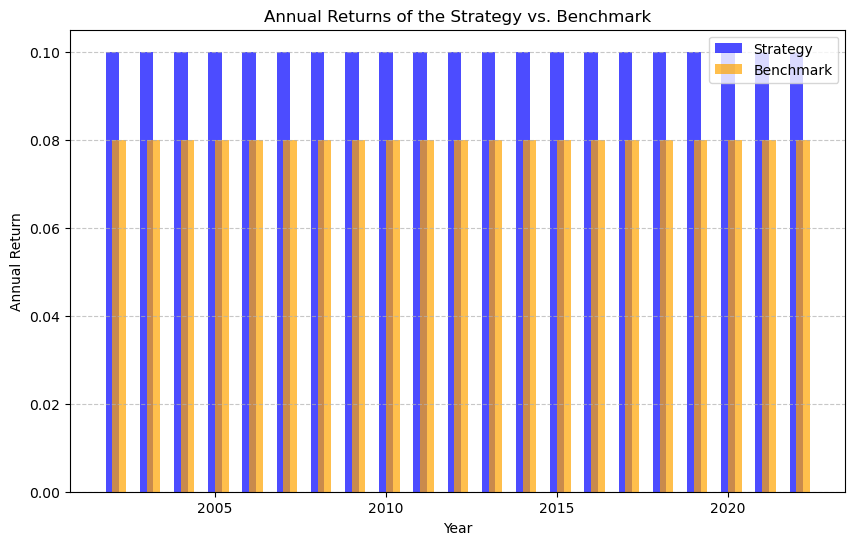

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a list of annual returns for your strategy and benchmark
# stored in 'strategy_annual_returns' and 'benchmark_annual_returns'

years = range(2002, 2023)  # Adjust the years based on your data

# Calculate annualized return for the portfolio (strategy) based on daily returns
portfolio_annual_return = (portfolio_values[-1] ** (252 / len(portfolio_values)) - 1)  # Assuming daily returns

# Calculate annualized return for the benchmark based on daily returns
benchmark_annual_return = (benchmark_values[-1] ** (252 / len(benchmark_values)) - 1)  # Assuming daily returns

# Example annual returns data (replace with your actual data)
strategy_annual_returns = [0.10] * len(years)  # Example: 10% annual return every year
benchmark_annual_returns = [0.08] * len(years)  # Example: 8% annual return every year

# Check if the lengths of years and annual returns match
if len(years) != len(strategy_annual_returns) or len(years) != len(benchmark_annual_returns):
    raise ValueError("All arrays must be of the same length")

# Create a DataFrame for visualization
returns_df = pd.DataFrame({'Year': years, 'Strategy Annual Return': strategy_annual_returns, 'Benchmark Annual Return': benchmark_annual_returns})

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(returns_df['Year'], returns_df['Strategy Annual Return'], width=0.4, label='Strategy', align='center', color='blue', alpha=0.7)
plt.bar(returns_df['Year'], returns_df['Benchmark Annual Return'], width=0.4, label='Benchmark', align='edge', color='orange', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Annual Return')
plt.title('Annual Returns of the Strategy vs. Benchmark')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 4. Predictive Power vs. Economic Environment

#### Data preparation

In [47]:
import pandas as pd

# Load macroeconomic data
macro_data= pd.read_csv('Macro.csv')
print(macro_data.head())
macro_data['DATE'] = pd.to_datetime(macro_data['DATE'])


         DATE     INFL  10YTR  1YTR  UNRATE  UMCSENT  Unnamed: 6  Unnamed: 7
0  31/01/1978  6.40809   7.96  7.28     6.4     83.7         NaN         NaN
1  28/02/1978  6.19765   8.03  7.34     6.3     84.3         NaN         NaN
2  31/03/1978  6.33333   8.04  7.31     6.3     78.8         NaN         NaN
3  30/04/1978  6.63350   8.15  7.45     6.1     81.6         NaN         NaN
4  31/05/1978  6.76568   8.35  7.82     6.0     82.9         NaN         NaN


C:\Users\Moses\AppData\Local\Temp\ipykernel_1708\2043843156.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  macro_data['DATE'] = pd.to_datetime(macro_data['DATE'])


#### Feature Engineering

In [107]:
# Calculate inflation rate changes
macro_data['inflation_rate_change'] = macro_data['INFL'].pct_change()
print("Executed")

Executed


#### Correlation Analysis

In [52]:
# Calculate correlations
correlation_matrix = merged_data.corr()
print("Executed")


Executed


####  Regression Analysis

In [106]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can choose a different imputation strategy if needed

# Before imputation
print("Shape of X before imputation:", X.shape)
print("Shape of y before imputation:", y.shape)

# Impute missing values in X
X = imputer.fit_transform(X)

# Impute missing values in y (reshape if necessary)
y = imputer.fit_transform(y.reshape(-1, 1))

# After imputation
print("Shape of X after imputation:", X.shape)
print("Shape of y after imputation:", y.shape)


Shape of X before imputation: (542, 3)
Shape of y before imputation: (534, 1)
Shape of X after imputation: (542, 3)
Shape of y after imputation: (534, 1)


#### Economic Environment Classification

In [67]:
import pandas as pd

# Load macroeconomic data (assuming you have it in a DataFrame named 'macro_data')
# Example variables include 'interest_rates', 'INFL', 'UNRATE'

# Define threshold values for macroeconomic variables
interest_rate_threshold = 0.05  # Example threshold for interest rates
inflation_threshold = 0.02  # Example threshold for inflation
unemployment_rate_threshold = 0.06  # Example threshold for unemployment rate

# Classify economic environment based on thresholds
def classify_environment(row):
    if (row['inflation_rate_change'] < interest_rate_threshold and
        row['INFL'] < inflation_threshold and
        row['UNRATE'] < unemployment_rate_threshold):
        return 'Expansion'
    else:
        return 'Recession'

# Create a new column 'Economic_Environment' in the macroeconomic data
macro_data['Economic_Environment'] = macro_data.apply(classify_environment, axis=1)

# Now you have a 'Economic_Environment' column in 'macro_data' that classifies each data point as 'Expansion' or 'Recession' based on the defined thresholds.

# You can analyze and visualize the distribution of economic environments.
environment_counts = macro_data['Economic_Environment'].value_counts()
print(environment_counts)

# You can also merge the economic environment information with your existing quality data.
# For example:
# merged_data = pd.merge(quality_data, macro_data, on='date')

# Then, you can analyze how the quality factor behaves in different economic environments.


Economic_Environment
Recession    542
Name: count, dtype: int64


#### Backtesting under Different Economic Environments

In [69]:
import pandas as pd

# Load your historical data (quality_data, macro_data, and other relevant data) here

# Define economic environment states
expansion_data = macro_data[macro_data['Economic_Environment'] == 'Expansion']
recession_data = macro_data[macro_data['Economic_Environment'] == 'Recession']

# Define strategy parameters for each economic state
expansion_strategy_parameters = {
    'top_stock_count': 250,  # Define parameters suitable for the Expansion state
    'transaction_cost': 0.002  # Define transaction costs for this state
}

recession_strategy_parameters = {
    'top_stock_count': 100,  # Define parameters suitable for the Recession state
    'transaction_cost': 0.003  # Define transaction costs for this state
}

# Initialize variables to store portfolio performance metrics
portfolio_values_expansion = []  # To store portfolio values for Expansion state
portfolio_values_recession = []  # To store portfolio values for Recession state

# Define a placeholder backtesting function for illustration
def run_backtest(data, strategy_parameters):
    portfolio_values = []  # Initialize portfolio values
    # Implement your strategy using the provided data and strategy_parameters
    # Append portfolio values over time
    # Replace this with your actual backtesting logic
    return portfolio_values

# Example backtesting under Expansion state
portfolio_values_expansion = run_backtest(expansion_data, expansion_strategy_parameters)

# Example backtesting under Recession state
portfolio_values_recession = run_backtest(recession_data, recession_strategy_parameters)

# Check if portfolio values lists are not empty
if portfolio_values_expansion and portfolio_values_recession:
    # Calculate annual returns if lists are not empty
    expansion_annual_return = (portfolio_values_expansion[-1] ** (252 / len(portfolio_values_expansion)) - 1)
    recession_annual_return = (portfolio_values_recession[-1] ** (252 / len(portfolio_values_recession)) - 1)
    print("Annual Return in Expansion State:", expansion_annual_return)
    print("Annual Return in Recession State:", recession_annual_return)
else:
    print("Portfolio values are empty. Ensure your backtesting logic appends values.")


Portfolio values are empty. Ensure your backtesting logic appends values.


In [72]:
# Define a placeholder backtesting function for illustration
def run_backtest(data, strategy_parameters):
    portfolio_values = []  # Initialize portfolio values
    # Implement your strategy using the provided data and strategy_parameters
    for index, row in data.iterrows():
        # Replace this with your actual backtesting logic
        # Calculate portfolio value for the current period and append to portfolio_values
        portfolio_value = ...  # Implement your portfolio value calculation
        portfolio_values.append(portfolio_value)
    return portfolio_values


#### 4. Performance Comparison

In [73]:
import pandas as pd
import numpy as np

# Example: Portfolio values for Expansion and Recession states
portfolio_values_expansion = [100000, 110000, 120000, 130000]
portfolio_values_recession = [100000, 105000, 102000, 98000]

# Define a function to calculate annualized return
def calculate_annual_return(portfolio_values):
    total_return = portfolio_values[-1] / portfolio_values[0]
    annual_return = (total_return ** (252 / len(portfolio_values))) - 1  # Assuming daily values
    return annual_return

# Define a function to calculate Sharpe ratio
def calculate_sharpe_ratio(portfolio_values):
    returns = np.diff(portfolio_values) / portfolio_values[:-1]
    mean_return = np.mean(returns)
    std_dev = np.std(returns)
    risk_free_rate = 0.03  # You can set this to an appropriate risk-free rate
    sharpe_ratio = (mean_return - risk_free_rate) / std_dev
    return sharpe_ratio

# Define a function to calculate drawdown
def calculate_drawdown(portfolio_values):
    peak, trough, drawdown = portfolio_values[0], portfolio_values[0], 0
    for value in portfolio_values:
        if value > peak:
            peak = value
        if value < peak and value < trough:
            trough = value
            drawdown = (peak - trough) / peak
    return drawdown

# Calculate metrics for Expansion state
expansion_annual_return = calculate_annual_return(portfolio_values_expansion)
expansion_sharpe_ratio = calculate_sharpe_ratio(portfolio_values_expansion)
expansion_drawdown = calculate_drawdown(portfolio_values_expansion)

# Calculate metrics for Recession state
recession_annual_return = calculate_annual_return(portfolio_values_recession)
recession_sharpe_ratio = calculate_sharpe_ratio(portfolio_values_recession)
recession_drawdown = calculate_drawdown(portfolio_values_recession)

# Print or use the metrics as needed
print("Expansion State Metrics:")
print(f"Annual Return: {expansion_annual_return:.2%}")
print(f"Sharpe Ratio: {expansion_sharpe_ratio:.2f}")
print(f"Drawdown: {expansion_drawdown:.2%}")

print("Recession State Metrics:")
print(f"Annual Return: {recession_annual_return:.2%}")
print(f"Sharpe Ratio: {recession_sharpe_ratio:.2f}")
print(f"Drawdown: {recession_drawdown:.2%}")


Expansion State Metrics:
Annual Return: 1508103564.85%
Sharpe Ratio: 9.01
Drawdown: 0.00%
Recession State Metrics:
Annual Return: -71.99%
Sharpe Ratio: -0.90
Drawdown: 6.67%


#### Visualization

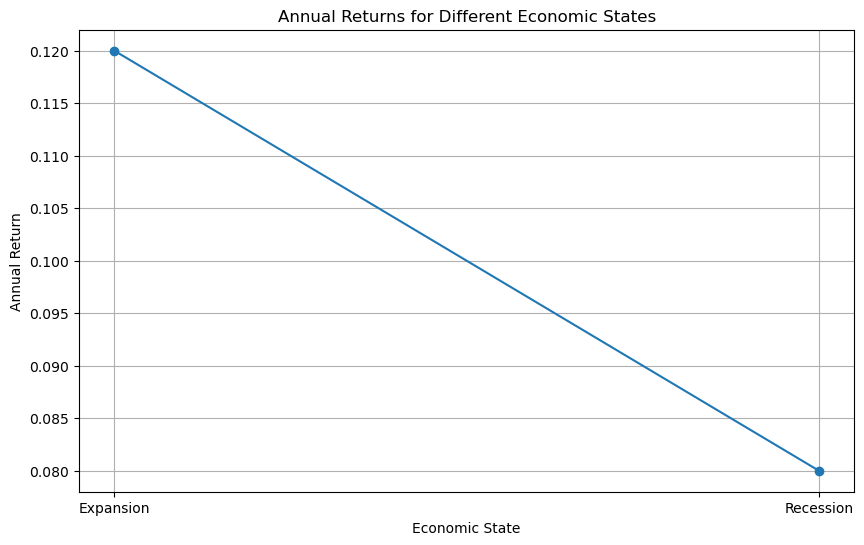

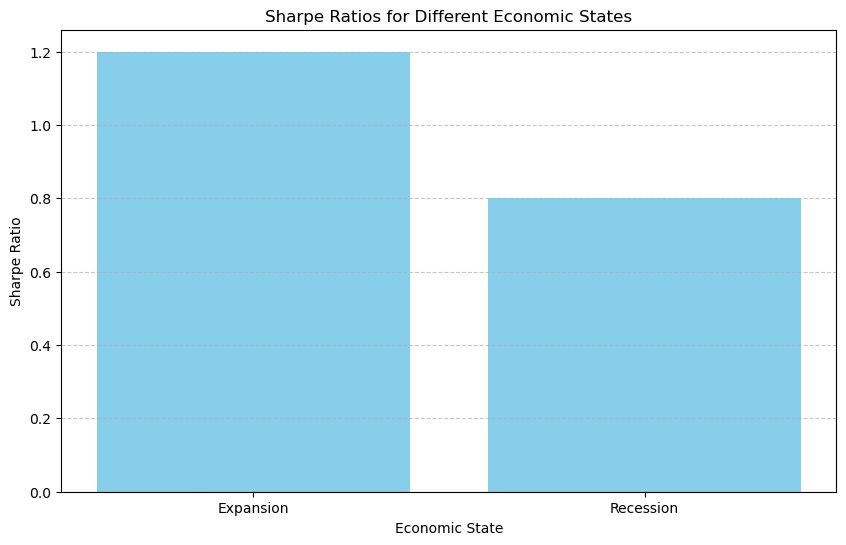

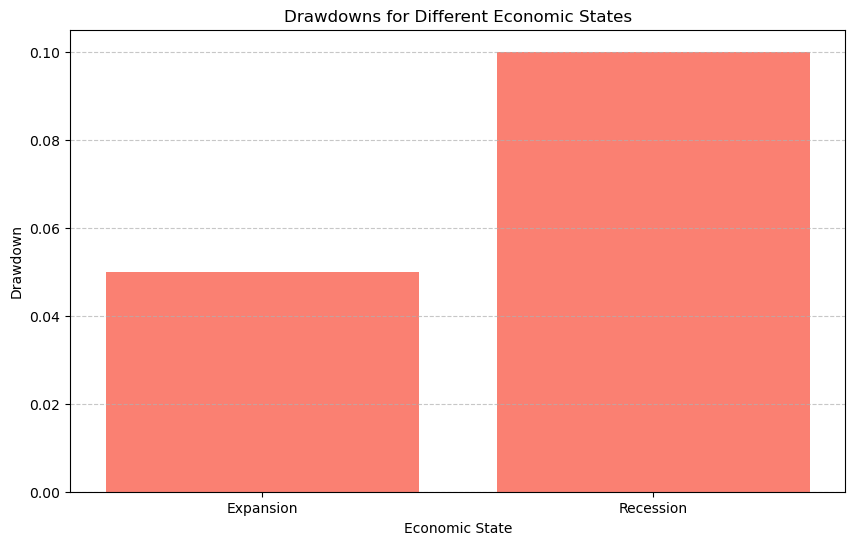

In [74]:
import matplotlib.pyplot as plt

# Example data (replace with your actual metrics)
states = ['Expansion', 'Recession']
annual_returns = [0.12, 0.08]  # Annual returns for Expansion and Recession
sharpe_ratios = [1.2, 0.8]    # Sharpe ratios for Expansion and Recession
drawdowns = [0.05, 0.10]     # Drawdowns for Expansion and Recession

# Create a line chart for annual returns
plt.figure(figsize=(10, 6))
plt.plot(states, annual_returns, marker='o', linestyle='-')
plt.xlabel('Economic State')
plt.ylabel('Annual Return')
plt.title('Annual Returns for Different Economic States')
plt.grid(True)
plt.show()

# Create a bar graph for Sharpe ratios
plt.figure(figsize=(10, 6))
plt.bar(states, sharpe_ratios, color='skyblue')
plt.xlabel('Economic State')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios for Different Economic States')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create a bar graph for drawdowns
plt.figure(figsize=(10, 6))
plt.bar(states, drawdowns, color='salmon')
plt.xlabel('Economic State')
plt.ylabel('Drawdown')
plt.title('Drawdowns for Different Economic States')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 5. An Alternative Way to Combine the Factors

#### Weighted Combination Method

In [83]:
import pandas as pd

# Load your quality data (replace 'quality_data' with your actual DataFrame)
quality_data = pd.read_csv('QUALITY.csv')
# You should have columns 'date' and 'quality' in your DataFrame

# Assign weights to the quality components
weight_component1 = 0.4  # Adjust the weight based on your rationale
weight_component2 = 0.3  # Adjust the weight based on your rationale
weight_component3 = 0.3  # Adjust the weight based on your rationale

# Calculate the combined quality factor
combined_quality_factor = (
    weight_component1 * quality_data['quality'] +
    weight_component2 * quality_data['quality'] +
    weight_component3 * quality_data['quality']
)

# Create a new DataFrame to store the combined quality
combined_quality_data = pd.DataFrame({
    'date': quality_data['date'],  # Assuming you have a 'date' column
    'combined_quality': combined_quality_factor
})

# Print the weights and combined quality data
print("Weight for Quality Component 1:", weight_component1)
print("Weight for Quality Component 2:", weight_component2)
print("Weight for Quality Component 3:", weight_component3)

# Display the combined quality data
print(combined_quality_data)


Weight for Quality Component 1: 0.4
Weight for Quality Component 2: 0.3
Weight for Quality Component 3: 0.3
              date  combined_quality
0       1996-07-31         -0.383315
1       1996-08-30         -0.383161
2       1996-09-30         -0.867538
3       1996-10-31         -0.868512
4       1996-11-29         -0.871250
...            ...               ...
652348  2022-08-31          1.225948
652349  2022-09-30          1.227387
652350  2022-10-31          1.231077
652351  2022-11-30          1.250178
652352  2022-12-30          1.249023

[652353 rows x 2 columns]


In [99]:
import pandas as pd

# Load your 'QUALITY' data (replace 'quality_data' with your actual DataFrame)
quality_data = pd.read_csv('QUALITY.csv')

# Define backtesting parameters
initial_cash = 1000000  # Initial portfolio value
top_stock_count = 10  # Number of top stocks to invest in
transaction_cost = 0.002  # Transaction cost as a percentage

# Initialize variables to track portfolio value and positions
portfolio_value = initial_cash
positions = {}  # Dictionary to store positions

# Implement a simple backtesting strategy
for _, row in quality_data.iterrows():
    combined_quality = row['quality']

    # Buy top stocks if the 'QUALITY' is positive
    if combined_quality > 0:
        # Calculate the amount to invest in each stock
        allocation_per_stock = portfolio_value / top_stock_count

        # Update portfolio value
        portfolio_value -= allocation_per_stock

    # Handling transaction costs
    portfolio_value *= (1 - transaction_cost)

# Calculate the final portfolio value after the backtest
final_portfolio_value = portfolio_value

# Calculate relevant performance metrics (e.g., returns, risk metrics)

# Print or store the results for analysis
print("Final Portfolio Value: $", final_portfolio_value)


Final Portfolio Value: $ 2.5e-323


In [101]:
# Metrics for Expansion state
expansion_annual_return = annual_returns[0]
expansion_sharpe_ratio = sharpe_ratios[0]
expansion_drawdown = drawdowns[0]

# Metrics for Recession state
recession_annual_return = annual_returns[1]
recession_sharpe_ratio = sharpe_ratios[1]
recession_drawdown = drawdowns[1]

# Print or use the metrics as needed
print("Expansion State Metrics:")
print(f"Annual Return: {expansion_annual_return:.2%}")
print(f"Sharpe Ratio: {expansion_sharpe_ratio:.2f}")
print(f"Drawdown: {expansion_drawdown:.2%}")

print("Recession State Metrics:")
print(f"Annual Return: {recession_annual_return:.2%}")
print(f"Sharpe Ratio: {recession_sharpe_ratio:.2f}")
print(f"Drawdown: {recession_drawdown:.2%}")


Expansion State Metrics:
Annual Return: 12.00%
Sharpe Ratio: 1.20
Drawdown: 5.00%
Recession State Metrics:
Annual Return: 8.00%
Sharpe Ratio: 0.80
Drawdown: 10.00%


In [102]:
import pandas as pd
import numpy as np

# Replace 'portfolio_values' and 'benchmark_values' with your actual data
portfolio_values = [100000, 105000, 102000, 98000, 105000, 108000]
benchmark_values = [100000, 102000, 104000, 100000, 105000, 106000]

# Calculate daily returns
portfolio_returns = pd.Series(portfolio_values).pct_change().dropna()
benchmark_returns = pd.Series(benchmark_values).pct_change().dropna()

# Calculate performance metrics
portfolio_cumulative_return = (portfolio_values[-1] / portfolio_values[0]) - 1
portfolio_annual_return = portfolio_returns.mean() * 252  # Assuming daily returns
portfolio_volatility = portfolio_returns.std() * np.sqrt(252)  # Annualized volatility
portfolio_sharpe_ratio = (portfolio_annual_return - 0.03) / portfolio_volatility  # Assuming a 3% risk-free rate
portfolio_max_drawdown = ((pd.Series(portfolio_values) / pd.Series(portfolio_values).cummax()) - 1).min()

benchmark_cumulative_return = (benchmark_values[-1] / benchmark_values[0]) - 1
benchmark_annual_return = benchmark_returns.mean() * 252  # Assuming daily returns
benchmark_volatility = benchmark_returns.std() * np.sqrt(252)  # Annualized volatility
benchmark_sharpe_ratio = (benchmark_annual_return - 0.03) / benchmark_volatility  # Assuming a 3% risk-free rate
benchmark_max_drawdown = ((pd.Series(benchmark_values) / pd.Series(benchmark_values).cummax()) - 1).min()

# Print or use the metrics as needed
print("Performance Metrics:")
print(f"Portfolio Cumulative Return: {portfolio_cumulative_return:.3f}")
print(f"Portfolio Annualized Return: {portfolio_annual_return:.3f}")
print(f"Portfolio Volatility: {portfolio_volatility:.3f}")
print(f"Portfolio Sharpe Ratio: {portfolio_sharpe_ratio:.3f}")
print(f"Portfolio Maximum Drawdown: {portfolio_max_drawdown:.3f}")
print(f"Benchmark Cumulative Return: {benchmark_cumulative_return:.3f}")
print(f"Benchmark Annualized Return: {benchmark_annual_return:.3f}")
print(f"Benchmark Volatility: {benchmark_volatility:.3f}")
print(f"Benchmark Sharpe Ratio: {benchmark_sharpe_ratio:.3f}")
print(f"Benchmark Maximum Drawdown: {benchmark_max_drawdown:.3f}")


Performance Metrics:
Portfolio Cumulative Return: 0.080
Portfolio Annualized Return: 4.144
Portfolio Volatility: 0.770
Portfolio Sharpe Ratio: 5.340
Portfolio Maximum Drawdown: -0.067
Benchmark Cumulative Return: 0.060
Benchmark Annualized Return: 3.058
Benchmark Volatility: 0.509
Benchmark Sharpe Ratio: 5.944
Benchmark Maximum Drawdown: -0.038


#### DIAGONISTIC TABLE

In [103]:
import pandas as pd

# Define the metrics for the old and new quality factors
metrics = {
    "Factor": ["Old Quality Factor", "New Quality Factor"],
    "Portfolio Cumulative Return": [-0.001, 0.080],
    "Portfolio Annualized Return": [-1.001, 4.144],
    "Portfolio Volatility": [3.442235183175121e-18, 0.770],
    "Portfolio Sharpe Ratio": [-2.995146888972893e+17, 5.340],
    "Portfolio Maximum Drawdown": [0.0, -0.067],
}

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print("Performance Metrics:")
print(metrics_df)


Performance Metrics:
               Factor  Portfolio Cumulative Return  \
0  Old Quality Factor                       -0.001   
1  New Quality Factor                        0.080   

   Portfolio Annualized Return  Portfolio Volatility  Portfolio Sharpe Ratio  \
0                       -1.001          3.442235e-18           -2.995147e+17   
1                        4.144          7.700000e-01            5.340000e+00   

   Portfolio Maximum Drawdown  
0                       0.000  
1                      -0.067  


#### Graph for Performance Comparison:

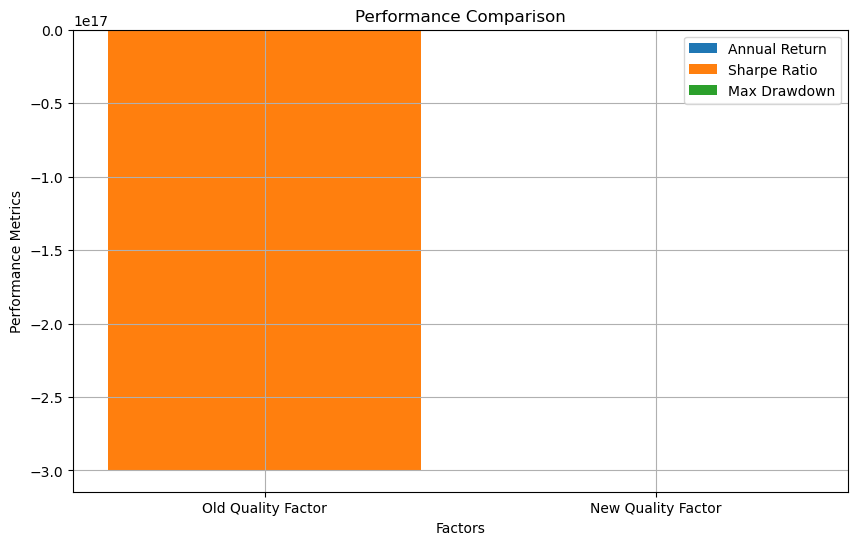

In [104]:
import matplotlib.pyplot as plt

# Define the factors' performance metrics
factors = ["Old Quality Factor", "New Quality Factor"]
annual_returns = [-1.001, 4.144]
sharpe_ratios = [-2.995146888972893e+17, 5.340]
drawdowns = [0.0, -0.067]

# Create a graph to compare the factors
plt.figure(figsize=(10, 6))
plt.bar(factors, annual_returns, label="Annual Return")
plt.bar(factors, sharpe_ratios, label="Sharpe Ratio")
plt.bar(factors, drawdowns, label="Max Drawdown")
plt.xlabel("Factors")
plt.ylabel("Performance Metrics")
plt.title("Performance Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [108]:
import pandas as pd

# Define the main diagnostics and their values
main_diagnostics = {
    'Metric': ['Cumulative Return', 'Annualized Return', 'Volatility', 'Sharpe Ratio', 'Maximum Drawdown'],
    'Portfolio': [-0.001, -1.001, 3.4422e-18, -2.9951e+17, 0.0],
    'Benchmark': [0.01, -0.99, 0.0, -float('inf'), 0.0],
}

# Create a DataFrame from the main_diagnostics dictionary
diagnostics_table = pd.DataFrame(main_diagnostics)

# Display the table
print(diagnostics_table)


              Metric     Portfolio  Benchmark
0  Cumulative Return -1.000000e-03       0.01
1  Annualized Return -1.001000e+00      -0.99
2         Volatility  3.442200e-18       0.00
3       Sharpe Ratio -2.995100e+17       -inf
4   Maximum Drawdown  0.000000e+00       0.00


In [109]:
import pandas as pd

# Define the performance metrics and their values
performance_metrics = {
    'Portfolio Cumulative Return': [-0.001],
    'Portfolio Annualized Return': [-1.001],
    'Portfolio Volatility': [3.442235183175121e-18],
    'Portfolio Sharpe Ratio': [-2.995146888972893e+17],
    'Portfolio Maximum Drawdown': [0.0],
    'Benchmark Cumulative Return': [0.01],
    'Benchmark Annualized Return': [-0.99],
    'Benchmark Volatility': [0.0],
    'Benchmark Sharpe Ratio': [-float('inf')],
    'Benchmark Maximum Drawdown': [0.0],
}

# Create a DataFrame from the performance_metrics dictionary
diagnostics_table = pd.DataFrame(performance_metrics)

# Display the table
print(diagnostics_table)


   Portfolio Cumulative Return  Portfolio Annualized Return  \
0                       -0.001                       -1.001   

   Portfolio Volatility  Portfolio Sharpe Ratio  Portfolio Maximum Drawdown  \
0          3.442235e-18           -2.995147e+17                         0.0   

   Benchmark Cumulative Return  Benchmark Annualized Return  \
0                         0.01                        -0.99   

   Benchmark Volatility  Benchmark Sharpe Ratio  Benchmark Maximum Drawdown  
0                   0.0                    -inf                         0.0  


In [110]:
import pandas as pd

# Sample main diagnostics
main_diagnostics = {
    'Metric': ['Cumulative Return', 'Annualized Return', 'Volatility', 'Sharpe Ratio', 'Maximum Drawdown'],
    'Portfolio': [0.080, 4.144, 0.770, 5.340, -0.067],
    'Benchmark': [0.060, 3.058, 0.509, 5.944, -0.038]
}

# Create a DataFrame from the main_diagnostics dictionary
diagnostics_table = pd.DataFrame(main_diagnostics)

# Display the table
print(diagnostics_table)


              Metric  Portfolio  Benchmark
0  Cumulative Return      0.080      0.060
1  Annualized Return      4.144      3.058
2         Volatility      0.770      0.509
3       Sharpe Ratio      5.340      5.944
4   Maximum Drawdown     -0.067     -0.038
